In [1]:
# ignore all future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
# imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# given by the assignment
def loadData():
    with np.load('notMNIST.npz') as data :
        Data, Target = data['images'], data['labels']
        posClass = 2
        negClass = 9
        dataIndx = (Target==posClass) + (Target==negClass)
        Data = Data[dataIndx]/255.
        Target = Target[dataIndx].reshape(-1, 1)
        Target[Target==posClass] = 1
        Target[Target==negClass] = 0
        np.random.seed(421)
        randIndx = np.arange(len(Data))
        np.random.shuffle(randIndx)
        Data, Target = Data[randIndx], Target[randIndx]
        trainData, trainTarget = Data[:3500], Target[:3500]
        validData, validTarget = Data[3500:3600], Target[3500:3600]
        testData, testTarget = Data[3600:], Target[3600:]
    return trainData, validData, testData, trainTarget, validTarget, testTarget

In [22]:
trainData, validData, testData, trainTarget, validTarget, testTarget = loadData()
print(f"Training Data: {trainData.shape}\tTraining tagets: {trainTarget.shape}")
print(f"Validation Data: {validData.shape}\tValidation tagets: {validTarget.shape}")
print(f"Testing Data: {testData.shape}\tTesting tagets:{testTarget.shape}")

Training Data: (3500, 28, 28)	Training tagets: (3500, 1)
Validation Data: (100, 28, 28)	Validation tagets: (100, 1)
Testing Data: (145, 28, 28)	Testing tagets:(145, 1)


In [35]:
def plot(image, target):
    plt.imshow(image, cmap="hot")
    plt.title('J' if target == 0 else 'C')
    # targets are binary encoded 0 == 'J' and 1 == 'C'
    plt.show()

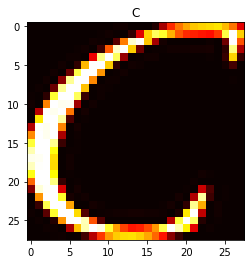

In [34]:
plot(trainData[92], trainTarget[92])

# 1 Linear Regression
### 1. Loss Function and Gradient

In [27]:
# Mean Squared Error Loss

# TODO: make x and W augemnted with b and 1s respectively
def MSE(W, b, x, y, reg):
    # L = 1/N[ ||Xw - y||^2 + \lambda * ||w||^2 ]
    N = y.shape[0]
    return 1.0/N * (np.linalg.norm(x.dot(W) + b - y)**2 + reg * (np.linalg.norm(W)**2 + b**2)

def gradMSE(W, b, x, y, reg):
    # dL = 2/N[ X^T (Xw - y) + \lambda w ]
    N = y.shape[0]
    return 2.0/N * ( x.T.dot( x.dot(W) + b - y ) + reg * W )

### 2. Gradient Descent Implementation

In [39]:
def grad_descent_MSE(W, b, x, y, alpha, epochs, reg, error_tol):
    for e in range(epochs):
        for batch in batch:
            # do something 
            pass

### 3. Tuning the Learning Rate

In [ ]:
# functions to plot loss and accuracy
def plot_loss(x, train_loss=None, valid_loss=None, test_loss=None, title=None):
    if train_loss != None:
        plt.plot(x, train_loss, label="Training Loss")
    if valid_loss != None:
        plt.plot(x, valid_loss, label="Validation Loss")
    if test_loss != None:
        plt.plot(x, test_loss, label="Testing Loss")
    
    if title == None:
        plt.title("Training Loss")
    else:
        plt.title(title)
    
    plt.xlabel("Epochs")
    plt.xlim(left=0)
    plt.ylabel("Loss")
    plt.legend(loc="upper right")
    plt.show()
    plt.clf()

def plot_accuracy(x, train_accuracy=None, valid_accuracy=None, test_accuracy=None, title=None):
    if train_accuracy != None:
        plt.plot(x, train_accuracy, label="Training Accuracy")
    if valid_accuracy != None:
        plt.plot(x, valid_accuracy, label="Validation Accuracy")
    if test_accuracy != None:
        plt.plot(x, test_accuracy, label="Testing Accuracy")
    
    if title == None:
        plt.title("Accuracy")
    else:
        plt.title(title)

    plt.xlabel("Epochs")
    plt.xlim(left=0)
    plt.ylabel("Accuracy")
    plt.yticks(np.arange(0, 1.1, step=0.1))
    plt.grid(linestyle='-', axis='y')
    plt.legend(loc="lower right")
    plt.show()
    plt.clf()

In [ ]:
# Test your implementation of Gradient Descent with 5000 epochs and \lambda = 0. Investigate the
# impact of learning rate, \alpha = 0.005, 0.001, 0.0001 on the performance of your classifier. 
# Plot the training, validation and test losses.

### 4. Generalization

In [41]:
# Investigate impact by modifying the regularization parameter, \lambda = {0.001, 0.1, 0.5}. 
# Plot the training, validation and test loss for \alpha = 0:005 and report the final training, 
# validation and test accuracy of your classifier.

### 5. Comparing Batch GD with normal equation

In [42]:
def least_squares(X, y):
    return np.linalg.inv( np.dot(X.T, X) ).dot(X.T).dot(y)
# compare above to gradient descent solution

# 2 Logistic Regression
## 2.1 Binary cross-entropy loss
### 1. Loss Function and Gradient

In [ ]:
# this will work for both scalar and vector z
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

# Cross Entropy Loss
def crossEntropyLoss(W, b, x, y, reg):
    y_hat = sigmoid(x.dot(W) + b)
    L = np.vectorize(lambda x,y: -np.log(x) if y == 1 else -np.log(1-x))(y_hat, y)
    #... not finished

def gradCE(W, b, x, y, reg):
    # Your implementation here
    pass

### 2. Learning

In [ ]:
def grad_descent(W, b, x, y, alpha, epochs, reg, error_tol, lossType="MSE"):
    if lossType == "MSE":
        return grad_descent_MSE(W, b, x, y, alpha, epochs, reg, error_tol)
    elif lossType == "CE":
        pass
    else:
        raise ValueError("Variable 'lossType' must be either 'MSE' or 'CE'.")

### 3. Comparision to Linear Regression

In [ ]:
# For zero weight decay, learning rate of 0.005 and 5000 epochs, 
# plot the training cross entropy loss and MSE loss for 
# logistic regression and linear regression respectively.
# Comment on the effect of cross-entropy loss convergence behaviour.

# 3 Batch Gradient Descent vs. SGD and Adam
## 3.1 SGD
### 1. Building the Computational Graph

In [43]:
def buildGraph(loss="MSE"):
    #Initialize weight and bias tensors
    tf.set_random_seed(421)

    if loss == "MSE":
        # Your implementation
        pass
    elif loss == "CE":
        #Your implementation here
        pass
    else:
        raise ValueError("Variable 'lossType' must be either 'MSE' or 'CE'.")

### 2. Implementing Stochastic Gradient Descent

In [ ]:
# Implement the SGD algorithm for a minibatch size of 500 
# optimizing over 700 epochs 2, minimizing the MSE (you will repeat this for the CE later).
# Calculate the total number of batches required by dividing the number
# of training instances by the minibatch size. After each epoch you will need to reshuffle the
# training data and start sampling from the beginning again. Initially, set \lambda = 0 and continue
# to use the same \alpha value (i.e. 0.001). After each epoch, store the training, validation and test
# losses and accuracies. Use these to plot the loss and accuracy curves.

### 3. Batch Size Investigation

### 4. Hyperparameter Investigation

### 5. Cross Entropy Loss Investigation

### 6. Comparison against Batch GD